In [ ]:
import torch 

In [ ]:
from transformers import pipeline,SamModel, SamProcessor
generator = pipeline(
    task="mask-generation",
    model="facebook/sam-vit-base",
    processor="facebook/sam-vit-base",
    device=0,
    points_per_batch=256
)



In [ ]:
image_url = r"C:\Users\Aditya\Downloads\FN505-1.jpg"
outputs = generator(image_url, points_per_batch = 256)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Extract the first mask from the list
first_mask = outputs['masks'][0]
# Plot the mask
plt.figure(figsize=(6,6))
plt.imshow(first_mask, cmap='gray')  # Use a gray colormap to visualize the mask
plt.axis('off')  # Hide the axes
plt.show()

In [4]:
import torch
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline
from diffusers import AutoPipelineForInpainting

# Load the image and mask image
image_path = r"C:\Users\Aditya\Downloads\aura_stable_diffusion\wetransfer_org22052_1-jpg_2023-08-01_1525\OSN23012_3.jpg" # Update this path
mask_image_path = r"C:\Users\Aditya\Downloads\download (3).png" # Update this path

image = Image.open(image_path)
mask_image = Image.open(mask_image_path)



# Initialize the pipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")

blurred_mask = pipe.mask_processor.blur(mask_image, blur_factor=0.50)

# Provide your prompt
prompt = '''In the realm of still life painting, meticulous composition in 4K enhances the opulence of the necklace.
The focal point is the necklace
A shallow depth of field preserves sharp focus on the necklace, while the blurred background directs the viewer's gaze, accentuating the allure of the jewelry.
'''
negative_prompt = "deformed, ugly, disfigured"
# Run the inpainting pipeline
output = pipe(prompt=prompt,negative_prompt=negative_prompt,image=image, mask_image=blurred_mask,guidance_scale=7.5,num_inference_steps=250)
result_image = output.images[0]

# Save the result
save_path = r"C:\Users\Aditya\Downloads\jewellery24.png"  # Update this path if needed
result_image.save(save_path)

100%|██████████| 250/250 [00:55<00:00,  4.48it/s]


In [ ]:
import torch
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline

image_path = r"C:\Users\Aditya\Downloads\image_480.png" # Update this path
mask_image_path = r"C:\Users\Aditya\Downloads\download (2).png"  # Update this path

image = Image.open(image_path)
mask_image = Image.open(mask_image_path)

# Initialize the pipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")

# Provide your prompt
prompt = '''Close-up portrait of a necklace on a model, focusing on necklace .The model's face is out of frame, with soft lighting accentuating the jewelry against smooth skin. do not change the design '''

# Run the inpainting pipeline
output = pipe(prompt=prompt, image=image, mask_image=mask_image,guidance_scale=7.5,num_inference_steps=200)
result_image = output.images[0]

# Save the result
save_path = r"C:\Users\Aditya\Downloads\jewellery6.png"  # Update this path if needed
result_image.save(save_path)

In [1]:
!nvidia-smi

Tue Mar  5 15:31:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.34                 Driver Version: 537.34       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P0              17W /  80W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  8.19it/s]
c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\diffuse

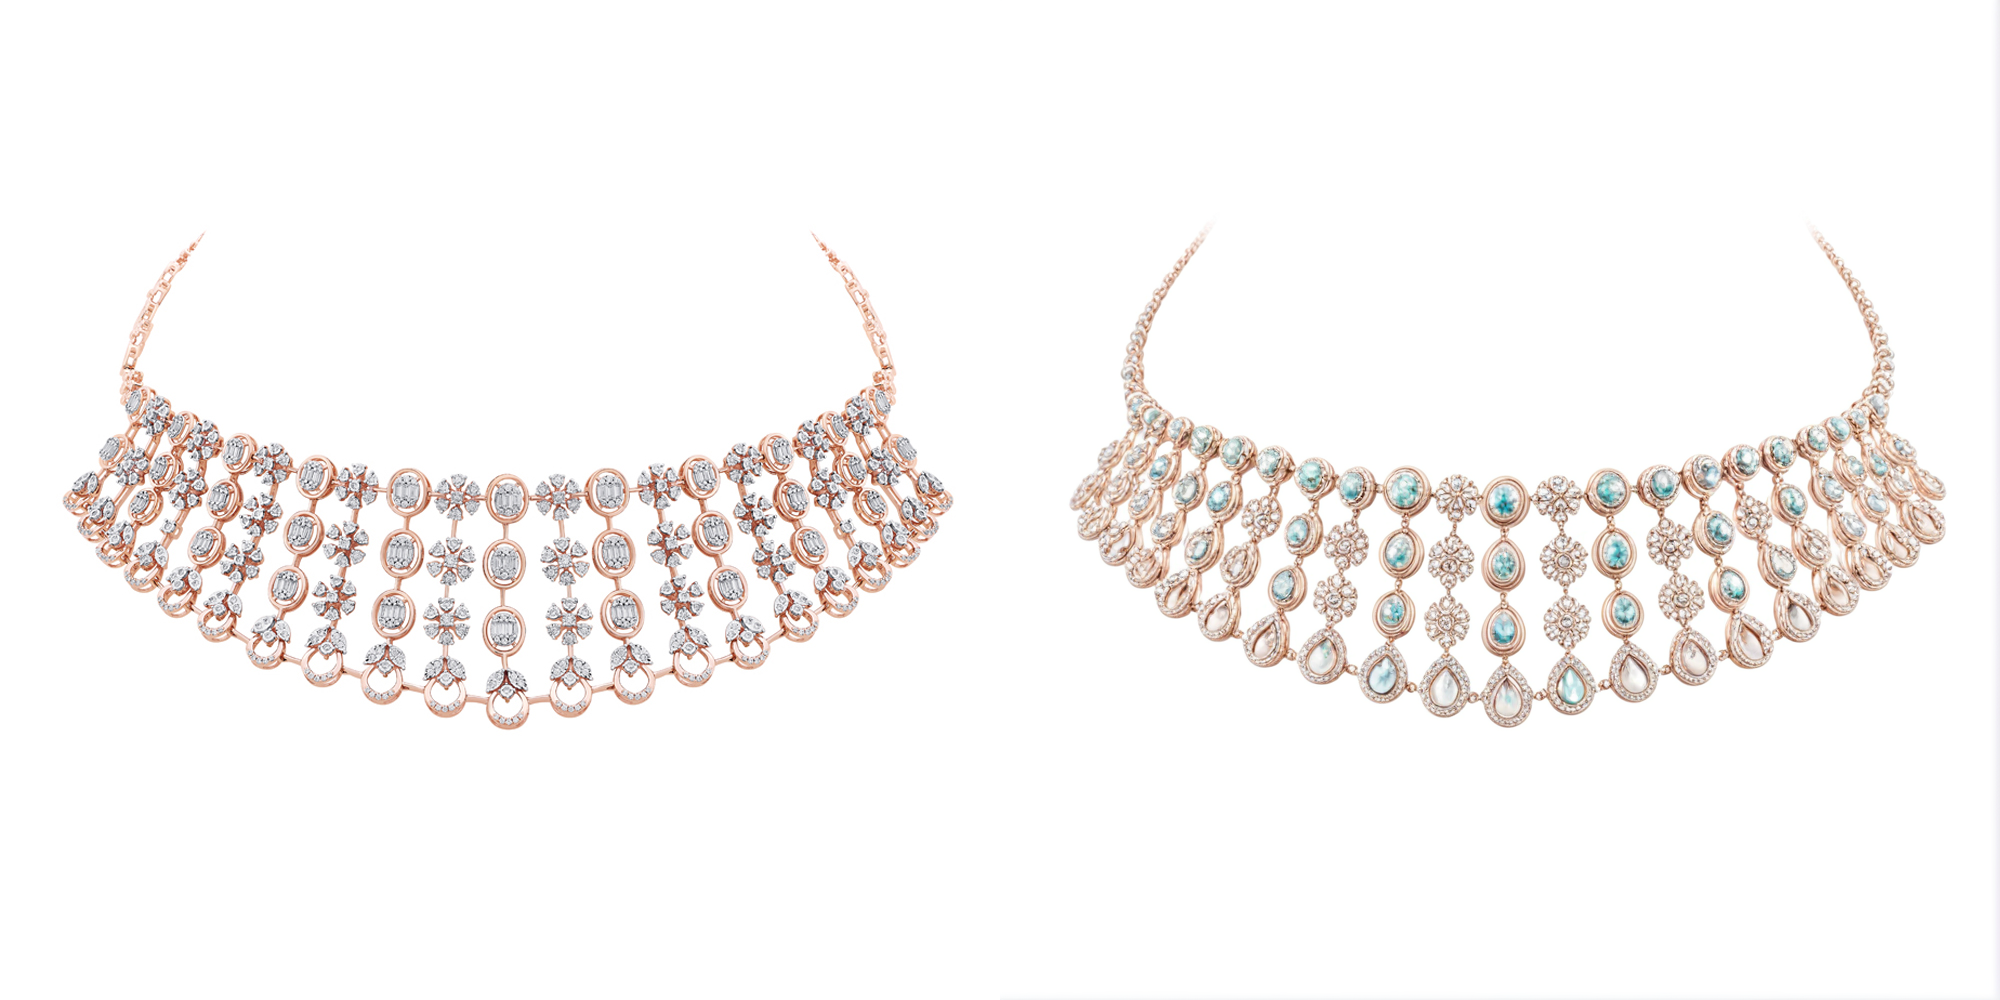

In [1]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = r"C:\Users\Aditya\Downloads\aura_stable_diffusion\wetransfer_org22052_1-jpg_2023-08-01_1525\OSN23012_3.jpg"
init_image = load_image(url)

prompt = "Close-up portrait of a necklace on a model, focusing on necklace .The model's face is out of frame, with soft lighting accentuating the jewelry against smooth skin. do not change the design "

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image, strength=0.5).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

In [2]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = r"C:\Users\Aditya\Downloads\aura_stable_diffusion\wetransfer_org22052_1-jpg_2023-08-01_1525\OSN23012_3.jpg"
init_image = load_image(url)

prompt = "Close-up portrait of a necklace on a model, focusing on necklace .The model's face is out of frame, with soft lighting accentuating the jewelry against smooth skin. do not change the design "

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

model_index.json: 100%|██████████| 250/250 [00:00<00:00, 130kB/s]
c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Aditya\.cache\huggingface\hub\models--kandinsky-community--kandinsky-2-2-decoder. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


OSError: [Errno 28] No space left on device